# Формулы для MDE

MDE (minimum detectable effect) - минимальный детектируемый размер эффекта, который бизнес хочет увидеть в ходе эксперимента, т.е. это увеличение какой-то метрики

## MDE для оценки среднего

**Формула размера выборки**

$$n = \frac{(\sigma_1^2+\sigma_2^2)(Z_{1-\alpha/2}+Z_{1-\beta})^2}{(\mu_1-\mu_2)^2}$$
где:

$\sigma_1^2, \sigma_2^2$ - дисперсии в тестовой и контрольной группах

$Z_{1-\alpha/2}$ - z-значение для заданного уровня значимости

$Z_{1-\beta}$ - z-значение для заданной мощности

$\mu_1-\mu_2$ - MDE, minimum detectable effect

В ситуации, когда дисперсии выборок равны, или на стадии дизайна эксперимента, когда мы не можем предположить их значение, мы можем упростить формулу:

$$n = \frac{2\sigma^2(Z_{1-\alpha/2}+Z_{1-\beta})^2}{(\mu_1-\mu_2)^2} = \frac{2(Z_{1-\alpha/2}+Z_{1-\beta})^2}{(\frac{\mu_1-\mu_2}{\sigma})^2} = \frac{2(Z_{1-\alpha/2}+Z_{1-\beta})^2}{d^2}$$

В последней формуле нами была введена новая величина $d$ - стандартизированный размер эффекта или **effect size**

Можно получить простую формулу для уровня значимости 5% и уровня мощности 20%:

$$n = \frac{2*(1.96+0.84)^2}{d^2} = \frac{15.7}{d^2}$$

**Формула для рассчета мощности теста**

Мощность теста - это вероятность отклонить нулевую гипотезу в случае, когда эффект действительно присутствует, и по определению может быть выражен формулой $Power = 1-\beta$, где $\beta$ - вероятность совершить ошибку II рода

$$Power = 1-\Phi(Z_{1-\alpha/2} - \frac{\mu_1-\mu_2}{\sigma}*\sqrt{n}) = 1-\Phi(Z_{1-\alpha/2} - d\sqrt{n})$$

**Формула для расчета MDE**

$$\mu_1-\mu_2 = \frac{\sqrt{2}\sigma(Z_{1-\alpha/2}+Z_{1-\beta})}{\sqrt{n}}$$

**Effect size**

Концепция effect size включает в себя разные способы рассчета размера эффекта

Джейкоб Коэн для рассчета $d$ предлагал использовать объединенное стандартное отклонение для 2-х независимых выборок (индекс Коэна, Cohen's d):

$$s = \sqrt{\frac{(n_1-1)s_1^2+(n_2-1)s_2^2}{n_1+n_2-2}}$$

при этом в качестве дисперсии для каждой выборки $s_1^2, s_2^2$ брать исправленные дисперсии для выборок

Хеджес и Олкин, на основе оценки максимального правдоподобия предлагают исспользовать формулу
$$s = \sqrt{\frac{(n_1-1)s_1^2+(n_2-1)s_2^2}{n_1+n_2}}$$

Джин В. Гласс предложил свой расчет эффекта, который так и называется дельта Гласса. В нем используется стандартное отклонение только контрольной группы

$$\Delta = \frac{\bar{x_1}-\bar{x_2}}{s_2}$$

## MDE для оценки разности долей (пропорций)

Формура размера выборки

$$n = \frac{[P_1(1-P_1)+P_2(1-P_2)]*(Z_{1-\alpha/2}+Z_{1-\beta})^2}{(P_1-P_2)^2}$$
где:

$P_1(1-P_1), P_2(1-P_2)$ - дисперсии в тестовой и контрольной группах

$Z_{1-\alpha/2}$ - z-значение для заданного уровня значимости

$Z_{1-\beta}$ - z-значение для заданной мощности

$P_1-P_2$ - MDE, minimum detectable effect

# Обзор инструментов для решения задач получения необходимой мощности эксперимента

In [2]:
import math as m
import pandas as pd
import numpy as np
from numpy import array
from clickhouse_driver import Client

import scipy.stats as ss
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.power import TTestIndPower, tt_ind_solve_power
from statsmodels.stats.power import NormalIndPower

import matplotlib.pyplot as plt
import seaborn as sns

## Рассчет мощности теста для 2-х средних с помощью [statsmodels.stats.power.TTestIndPower.power](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.TTestIndPower.power.html#statsmodels.stats.power.TTestIndPower.power)

In [ ]:
# исходные данные
delta = 0.1                                    # ожидаемый менеджером прирост
sd_mean_control = 1                            # стандартное отклонение в контрольной группе
sd_mean_treatment = 1                          # стандартное отклонение в тестовой группе
sample_size = 200                              # размер имеющейся выборки
alpha = 0.05                                   # установленный уровень значимости

# расчет стандартизированного эффекта для разницы средних
effect_size = delta / ((sd_mean_control  + sd_mean_treatment) / 2) # для сбалансированных групп можем просто посчитать среднее стандартное отклонение

# Функция мощности t-теста
ttest_power = TTestIndPower()
t_test_power = (ttest_power.power(effect_size = effect_size, nobs1 = sample_size, alpha = alpha))
print(f"Вероятность, что тест зафиксирует эффект в {effect_size:.3} (мощность) при размере каждой выборки {sample_size} и alpha {alpha}: {t_test_power:.1%}")

# Изменим размер выборки и понаблюдаем, как изменится мощность
sample_size = 1000
t_test_power = (ttest_power.power(effect_size = effect_size, nobs1 = sample_size, alpha = alpha))
print(f"Вероятность, что тест зафиксирует эффект в {effect_size:.3} (мощность) при размере каждой выборки {sample_size} и alpha {alpha}: {t_test_power:.1%}")

# Повысим уровень значимости
sample_size = 200
alpha = 0.1
t_test_power = (ttest_power.power(effect_size = effect_size, nobs1 = sample_size, alpha = alpha))
print(f"Вероятность, что тест зафиксирует эффект в {effect_size:.3} (мощность) при размере каждой выборки {sample_size} и alpha {alpha}: {t_test_power:.1%}")

# Повысим уровень значимости
delta = 0.2
alpha = 0.5
effect_size = delta / ((sd_mean_control  + sd_mean_treatment) / 2)
t_test_power = (ttest_power.power(effect_size = effect_size, nobs1 = sample_size, alpha = alpha))
print(f"Вероятность, что тест зафиксирует эффект в {effect_size:.3} (мощность) при размере каждой выборки {sample_size} и alpha {alpha}: {t_test_power:.1%}")

Вероятность, что тест зафиксирует эффект в 0.1 (мощность) при размере каждой выборки 200 и alpha 0.05: 16.9%
Вероятность, что тест зафиксирует эффект в 0.1 (мощность) при размере каждой выборки 1000 и alpha 0.05: 60.8%
Вероятность, что тест зафиксирует эффект в 0.1 (мощность) при размере каждой выборки 200 и alpha 0.1: 26.3%
Вероятность, что тест зафиксирует эффект в 0.2 (мощность) при размере каждой выборки 200 и alpha 0.5: 91.1%


## Расчет мощности для z-теста с помощью [statsmodels.stats.power.NormalIndPower.power](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.NormalIndPower.power.html#statsmodels.stats.power.NormalIndPower.power)

В данном случае в качестве MDE будем считать изменение пропорции, например увеличение уровня конверсии. Стандартные отклонения оставим в том же размере

In [ ]:
sample_size = 200
alpha = 0.05
delta = 0.1
effect_size = delta / ((sd_mean_control  + sd_mean_treatment) / 2)

# Функция мощности z-теста
ztest_power = NormalIndPower()

z_test_power = (ztest_power.solve_power(effect_size = effect_size, nobs1 = sample_size, alpha = alpha))
print(f"Вероятность, что тест зафиксирует эффект в {effect_size:.3} (мощность) при размере каждой выборки {sample_size} и alpha {alpha}: {z_test_power:.1%}")

# Изменим размер выборки и понаблюдаем, как изменится мощность
sample_size = 1000
z_test_power = (ztest_power.solve_power(effect_size = effect_size, nobs1 = sample_size, alpha = alpha))
print(f"Вероятность, что тест зафиксирует эффект в {effect_size:.3} (мощность) при размере каждой выборки {sample_size} и alpha {alpha}: {z_test_power:.1%}")

# Повысим уровень значимости
sample_size = 200
alpha = 0.1
z_test_power = (ztest_power.solve_power(effect_size = effect_size, nobs1 = sample_size, alpha = alpha))
print(f"Вероятность, что тест зафиксирует эффект в {effect_size:.3} (мощность) при размере каждой выборки {sample_size} и alpha {alpha}: {z_test_power:.1%}")

# Повысим уровень значимости
delta = 0.2
alpha = 0.5
effect_size = delta / ((sd_mean_control  + sd_mean_treatment) / 2)
z_test_power = (ztest_power.solve_power(effect_size = effect_size, nobs1 = sample_size, alpha = alpha))
print(f"Вероятность, что тест зафиксирует эффект в {effect_size:.3} (мощность) при размере каждой выборки {sample_size} и alpha {alpha}: {z_test_power:.1%}")

Вероятность, что тест зафиксирует эффект в 0.1 (мощность) при размере каждой выборки 200 и alpha 0.05: 17.0%
Вероятность, что тест зафиксирует эффект в 0.1 (мощность) при размере каждой выборки 1000 и alpha 0.05: 60.9%
Вероятность, что тест зафиксирует эффект в 0.1 (мощность) при размере каждой выборки 200 и alpha 0.1: 26.4%
Вероятность, что тест зафиксирует эффект в 0.2 (мощность) при размере каждой выборки 200 и alpha 0.5: 91.1%


## Рассчет любого параметра теста для 2-х средних с помощью [statsmodels.stats.power.tt_ind_solve_power](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html)

In [ ]:
# Искомому параметру передаем None
# Рассчет MDE (не забудем перевести из effect_size)
effect_size = tt_ind_solve_power(effect_size = None,
                       alpha = 0.05,
                       power = 0.8,
                       ratio = 1, # соотношение количества наблюдений в выборке 2 относительно выборки 1
                       alternative = "two-sided",
                       nobs1 = 200) # количество наблюдений выборки 1. Количество наблюдений выборки два в соотношении с размером выборки 1, т.е. nobs2 = nobs1 * ratio
print(f'MDE, который мы можем себе позволить на заданном дизайне эксперимента: {effect_size * ((sd_mean_control  + sd_mean_treatment) / 2):.3}')

# Обратная задача для рассчета объема выборки по заданному effect_size
sample_size = tt_ind_solve_power(effect_size = effect_size,
                       alpha = 0.05,
                       power = 0.8,
                       ratio = 1,
                       alternative = "two-sided",
                       nobs1 = None)
print(f'Размер выборки под заданные MDE: {m.ceil(sample_size)}')

MDE, который мы можем себе позволить на заданном дизайне эксперимента: 0.281
Размер выборки под заданные MDE: 201


## Проверка мощности для теста со средними с помощью симуляции на синтетических данных

In [ ]:
# функция, которая генерирует 2 нормальных распределения - с эффектом и без
def simulate_data(control_mean, control_sd, rel_delta, sample_size, n_sim):
    np.random.seed(123)

    # Генерация значений для нулевой гипотезы из нормального распределения с заданными параметрами
    control = np.random.normal(loc = control_mean, scale = control_sd, size = (round(sample_size), n_sim))

    # Генерация значений для альтернативной гипотезы из нормального распределения с заданными параметрами
    treatment = np.random.normal(loc = control_mean*(1 + rel_delta), scale = control_sd, size = (round(sample_size), n_sim))

    return control, treatment

Мощность эксперимента: 17.2%


<Axes: ylabel='Density'>

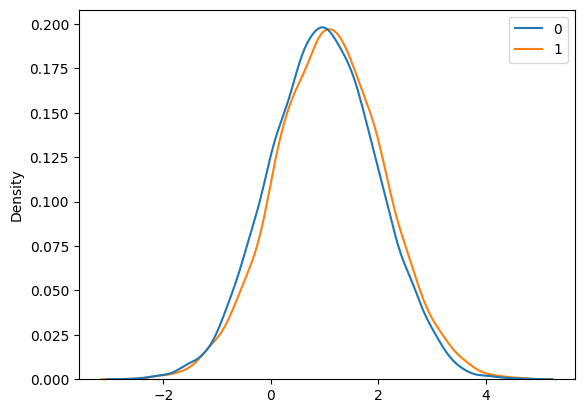

In [ ]:
rel_delta = 0.1               # относительный размер эффекта
control_mean = 1              # ср. в контрольной группе
control_sd = 1                # ст. отклонение в контрольной группе
sample_size = 200             # размер выборки из предыдущего расчета
alpha = 0.05                  # уровень значимости
n_sim = 10000                 # количество повторных симуляций

# Проведение t-теста
control, treatment = simulate_data(control_mean, control_sd, rel_delta, sample_size, n_sim)
t_stat_list, p_value_list = ss.ttest_ind(control, treatment) # Функция умеет делать рассчеты по нескольком массивам, возвращая 2 кортежа

power = (p_value_list < 0.05).sum() / n_sim # рассчитаем симуляций, в кот эффект был обнаружен (а мы знаем, что он есть)
print(f"Мощность эксперимента: {power:.1%}")

# Пример распределений для 2-х гипотез в одной из симуляций
sns.kdeplot(data=[control[100], treatment[100]])

## Расчет размера выборки с помощью tt_ind_solve_power

Данный способ имеет ограничение: он уместен только в тех случаях, когда применим t-тест. В реальности качество данных может не соответствовать условиям применения t-теста, в таком случае способ не гарантирует достаточной мощности


In [ ]:
rel_effect = 0.1         # минимальный аплифт, который ожидает менеджер
control_mean = 1         # среднее в контрольной группе
control_sd = 1           # стандартное отклонение в контрольной группе
alpha = 0.05             # уровень значимости

treat_mean = control_mean*(1 + rel_effect)
mean_diff = treat_mean - control_mean
effect_size = mean_diff / control_sd

sample_size = tt_ind_solve_power(effect_size = effect_size, alpha = alpha, power = 0.8, ratio = 1, alternative = "two-sided") # nobs1 можно не передавать
print(f"Минимальный размер выборки для достижения уровня значимости: {m.ceil(sample_size)}")

Минимальный размер выборки для достижения уровня значимости: 1571


In [ ]:
# Расчет размера выборки используя приближенную формулу
sample_size = 15.7 * control_sd**2 / mean_diff**2
print(f"Минимальный размер выборки для достижения уровня значимости: {m.ceil(sample_size)}")

Минимальный размер выборки для достижения уровня значимости: 1570


## Расчет размера выборки, используя симуляции (Монте-Карло)

В отличие от первого способа, этот способ имеет более широкий спектр применения.

Очень часто этот метод единственно возможный.

Нужно помнить, что он дает оценку мощности, а не ее истинное значение.

Количество симуляций д.б. не меньше 1000. Лучше брать большее кол-во симуляций на каждую итерацию, чтобы уменьшить дисперсию.

Text(1463, 0.05, 'Размер выборки через симуляцию: 1540')

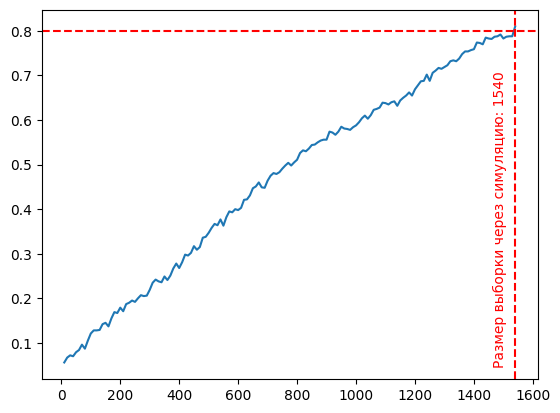

In [ ]:
sample_size_start = 10         # начальный размер выборки для симуляции
sample_size_step = 10          # шаг, с которым будем увеличивать размер выборки
power = 0.8                    # требуемый уровень мощности теста
alpha = 0.05                   # уровень значимости
control_mean = 1               # среднее в контрольной группе
control_sd = 1                 # стандартное отклонение в контрольной группе
n_sim = 1000                   # количество повторных симуляций, сначала попробовали 100 и получили 1450 объем выборки, что очень оличается от 1570, рассчитанных аналитически
rel_delta = 0.1                # относительный прирост, относительный MDE

power_value_list = []
sample_size_list = []
while True:
    p_value_list = []
    group_a, group_b_with_effect = simulate_data(control_mean, control_sd, rel_delta, sample_size_start, n_sim)
    t_stat, p_value = ss.ttest_ind(group_a, group_b_with_effect)
    p_value_list.append(p_value)
    power_value = (np.array(p_value_list) < 0.05).mean()
    power_value_list.append(power_value)
    sample_size_list.append(sample_size_start)
    if power_value > power:
        break
    else:
        sample_size_start += sample_size_step
final_sample_size = sample_size_start

# Построим график
sns.lineplot(x= sample_size_list, y = power_value_list)
plt.axhline(y = 0.8, linestyle  = '--', color = 'red')
plt.axvline(x = sample_size_start, linestyle  = '--', color = 'red')
plt.text(x = round(sample_size_start*0.95), y = 0.05, s = f'Размер выборки через симуляцию: {sample_size_start}', rotation = 'vertical', color = 'red')

Средняя по историческим данным: 1.0
Стандартное отклонение по историческим данным: 1.0


<Axes: ylabel='Density'>

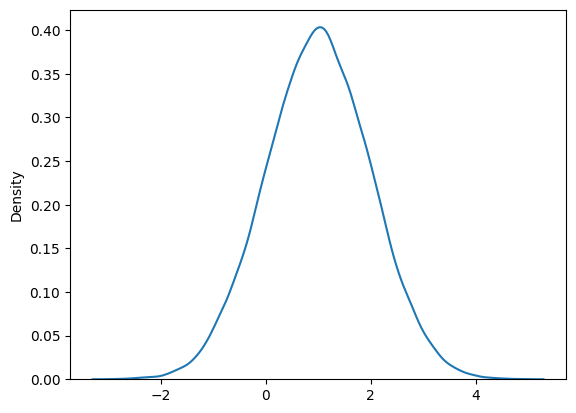

In [ ]:
# сгенерируем синтетические "исторические" данные
hist_data = np.random.normal(loc = control_mean, scale = control_sd, size = 50000)
print(f'Средняя по историческим данным: {hist_data.mean():.2}')
print(f'Стандартное отклонение по историческим данным: {hist_data.std():.2}')
sns.kdeplot(hist_data)

In [ ]:
# напишем вариант функции, которая может использоваться если данные исторические уже есть

def find_tt_sample_size(hist_data, n_sim, sample_size_start, rel_effect, sample_size_step):
    sample_size_list = []
    power_value_list = []
    while True:
        p_value_list = []
        for i in range(n_sim):
            group_a = np.random.choice(hist_data, size = sample_size_start)
            group_b_zero_effect = np.random.choice(hist_data, size = sample_size_start)
            group_b_with_effect = group_b_zero_effect*(1+rel_effect)
            t_stat, p_value = ss.ttest_ind(group_a, group_b_with_effect) # можно заменить на любой нужный тест, например мана-уитни
            p_value_list.append(p_value)
        power_value = (np.array(p_value_list) < 0.05).mean()
        power_value_list.append(power_value)
        sample_size_list.append(sample_size_start)
        if power_value > power:
            break
        else:
            sample_size_start += sample_size_step
    final_sample_size = sample_size_start
    final_power =  power_value

    sns.lineplot(x= sample_size_list, y = power_value_list)
    plt.axhline(y = 0.8, linestyle  = '--', color = 'red')
    plt.axvline(x = sample_size_start, linestyle  = '--', color = 'red')
    plt.text(x = round(sample_size_start*0.95), y = 0.3, s = f'Размер выборки через симуляцию: {final_sample_size}', rotation = 'vertical', color = 'red')

    return_object = {'sample_size': final_sample_size, 'power': final_power}

    return(final_sample_size, final_power)

(1580, 0.802)

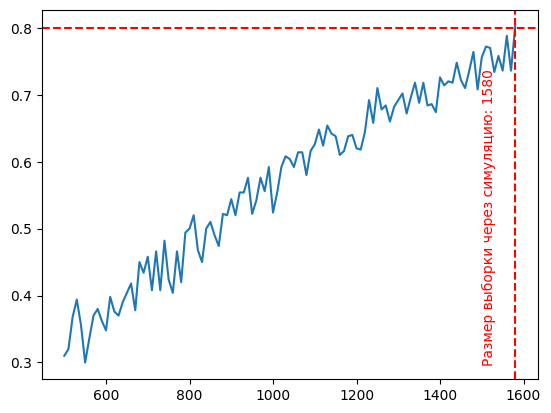

In [ ]:
# найдем по историческим данным  какая нам нужна выборка для детекции нужного MDE на исторических данных
find_tt_sample_size(hist_data = hist_data, n_sim = 500, sample_size_start = 500, rel_effect = 0.1, sample_size_step = 10)

Сравним с аналитическим расчетом размера выборки с помощью библиотечной функции. Полученное значение достаточно близко, к полученным ранее аналитически, хотя чуть ниже

In [ ]:
rel_effect = 0.1         # минимальный аплифт, который ожидает менеджер
control_mean = hist_data.mean()         # среднее в контрольной группе
control_sd = hist_data.std()           # стандартное отклонение в контрольной группе
alpha = 0.05             # уровень значимости

treat_mean = control_mean*(1 + rel_effect)
mean_diff = treat_mean - control_mean
effect_size = mean_diff / control_sd

sample_size = tt_ind_solve_power(effect_size = effect_size, alpha = 0.05, power = 0.8, ratio = 1, alternative = "two-sided")
print(f"Минимальный размер выборки для достижения уровня значимости: {m.ceil(sample_size)}")

Минимальный размер выборки для достижения уровня значимости: 1567


## Зависимость размера выборки от уровня значимости для теста на пропорции

С увеличением точности требуется больший размер выборки

Jacob Cohen. Statistical Power Analysis for the Behavioral Sciences (стр.182): </br>
https://www.taylorfrancis.com/books/mono/10.4324/9780203771587/statistical-power-analysis-behavioral-sciences-jacob-cohen

Стандартизация величины эффекта для пропорций:</br> https://www.statsmodels.org/dev/_modules/statsmodels/stats/proportion.html#proportion_effectsize

$$
d = 2 * (arcsin({p_1}^{1/2}) - arcsin({p_2}^{1/2}))
$$

In [ ]:
# поработаем с анализом размера выборки для разницы долей (пропорций)
def ztest_power_analysis():
    '''Функция определяет размер выборки в зависимости от выбранной мощности теста и уровня значимости'''

    # стандартизация величины эффекта
    d = sm.stats.proportion_effectsize(p1, p2) # рассчет стандартизированного эффекта для разницы двух долей

    # размер выборки для каждой группы c помощью солвера для z-теста, для случаев, когда распределение точно нормальное
    n = sms.NormalIndPower().solve_power(effect_size = d, power = power, alpha = alpha, ratio = 1)
    print('Установленный уровень значимости: ', alpha)
    print(f'Размер выборки для каждой группы, необходимый, чтобы задетектить эффект в {100*rel_mde}%: {m.ceil(n)}')


    # расчет мощности для z-теста для двух независимых групп
    ztest_power = sms.NormalIndPower()

    # на графике мы хотим отрисовать чуть больше значений выборки, поэтому берем 1,5*n
    sample_sizes = np.arange(50,round(1.5*n),10)

    # построение графика (встроен в библиотечную функцию)
    (ztest_power.plot_power(dep_var='nobs', nobs=sample_sizes,
    effect_size=[d], alpha = alpha, title=f'Анализ мощности при alpha = {alpha}'))

    # график, показывающий какую мощность теста можно достичь при заданном размере выборки
    plt.axhline(power, linestyle='--', label='выбранная мощность')
    plt.axvline(n, linestyle='--', color='orange', label='требуемая выборка')
    plt.ylabel('Мощность теста')
    plt.xlabel('Размер выборки')
    plt.grid(alpha=0.08)
    plt.legend()
    plt.show()

In [ ]:
# Параметры эксперимента
alpha = 0.05    # установленный уровень значимости = 0.05
power = 0.8    # статистический уровень мощности
rel_mde = 0.1      # минимальный размер эффекта, который хотим задетектить. относительный

# пропорции, если эффект присутствует
p1 = 0.10            # контрольная группа (старый логотип)
p2 = p1 * (1 + rel_mde)   # тестовая группа (новый логотип)

Установленный уровень значимости:  0.1
Размер выборки для каждой группы, необходимый, чтобы задетектить эффект в 10.0%: 11614


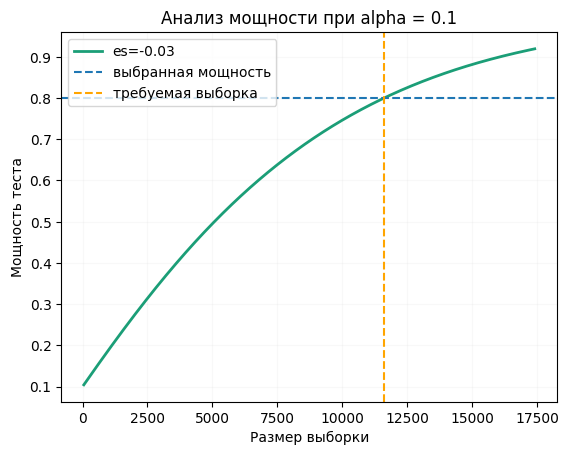

Установленный уровень значимости:  0.05
Размер выборки для каждой группы, необходимый, чтобы задетектить эффект в 10.0%: 14745


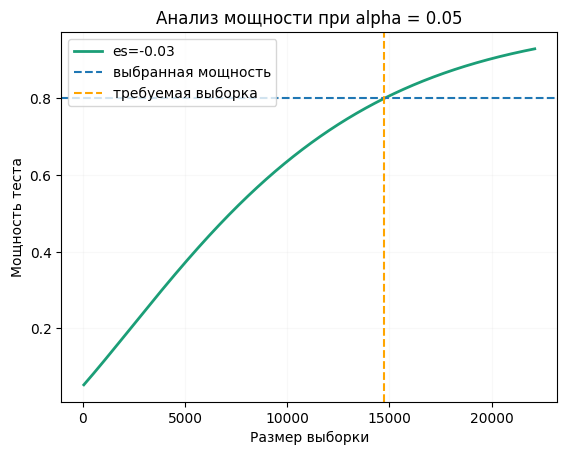

Установленный уровень значимости:  0.01
Размер выборки для каждой группы, необходимый, чтобы задетектить эффект в 10.0%: 21939


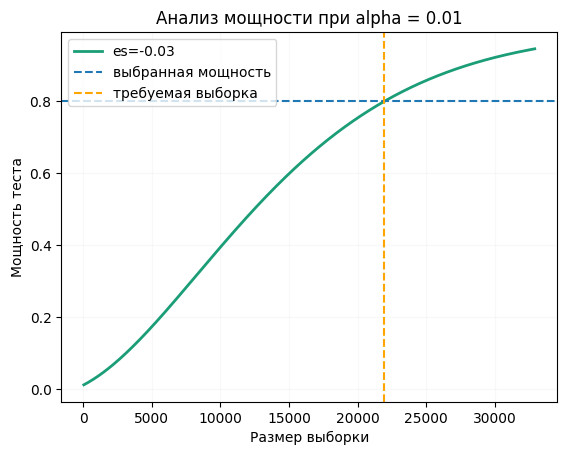

In [ ]:
for alpha in [0.1, 0.05, 0.01]:
    ztest_power_analysis()

## Зависимость размера выборки от размера эффекта для теста на пропорции

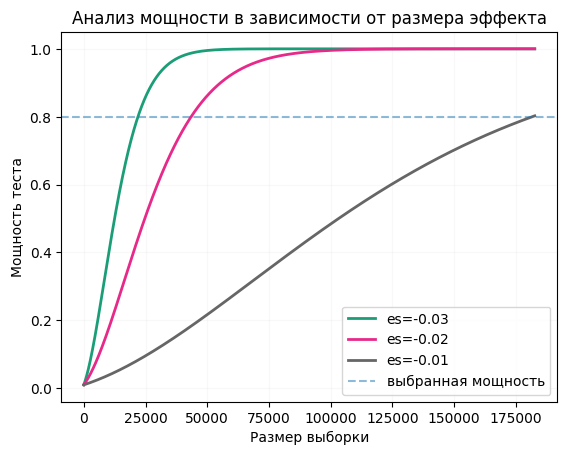

In [ ]:
# 3 конверсии в первой группе и 3 конверсии во второй группе. Во 2-й группе у конверсий есть прирост
p1 = [0.1, 0.08, 0.05]
p2 = [0.11, 0.0864, 0.0525]

effect_sizes = array(sm.stats.proportion_effectsize(p1, p2))

# Строго говоря использование tt_ind_solve_power здесь не уместно, но мы используем его только для расчета верхней границы для тех вариантов, кот будем перебирать
n = round(tt_ind_solve_power(effect_size=max(effect_sizes), power=power, alpha=alpha))
sample_sizes = array(range(5, n+1000))

ztest_power.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes, alpha = alpha, title='Анализ мощности в зависимости от размера эффекта')

# график, показывающий размер выборки для различных эффектов и заданной мощности
plt.axhline(power, linestyle='--', label='выбранная мощность', alpha=0.5)
plt.ylabel('Мощность теста')
plt.xlabel('Размер выборки')
plt.grid(alpha=0.08)
plt.legend()
plt.show()

# Задача I - определение размера выборки

**СПЕЦИФИКАЦИЯ**

**Бизнес-предпосылки**: в продукте планируется внедрение нового функционала с целью улучшить привлекательность услуги "premium". Менеджеры предполагают, что это позволит увеличить среднюю дневную выручку пользователей на 8% (revenue). Распределение пользователей на тестовую и контрольную группы будет происходить равномерно - группы будут одинакового размера. Дизайн теста предполагает вероятность в 5% совершить ошибку I рода и допущение в 20% совершить ошибку II рода.

**Задача**: необходимо определить минимально необходимый размер выборки, чтобы статистически значимо задетектить эффект увеличения выручки на 8% с учетом мощности теста в 80% и установленного уровня значимости alpha = 0.05 и сбаланисированного разбиения пользователей на тестовую и контрольную группы

**Решение**:
1. Определим текущий средний размер выручки на пользователя и ожидаемый размер выручки с учетом увеличения на 8%
2. Зная текущее стандартное отклонение, рассчитаем cohen's d
3. Для установленного уровня значимости и мощности (5% и 80%) и отношения размера тестовой группы к контольной 1/1 = 1 найдем необходимый размер выборки с помощью tt_ind_solve_power.

In [4]:
# Получение исторических данных
def get_data(query):
    """
    Выгружает данные из ClickHouse в виде Dataframe
    query - SQL запрос
    """
    client = Client(host='', port=9000, user='', password='', database='')
    result, columns = client.execute(query,with_column_types=True)
    return pd.DataFrame(result, columns=[tuple[0] for tuple in columns])

query = '''
        '''

df = get_data(query)
df

,passport_id,revenue
0,136192669,1105
1,131562027,1305
2,131381233,2210
3,143610798,2210
4,132962079,1105
...,...,...
1048,138285471,1105
1049,142585954,1100
1050,143636850,2210
1051,123891878,1105


In [35]:
print(f'Текущая средняя выручка = {df.revenue.mean():.0f} руб. \nОжидаемое увеличение выручки на 8% = {df.revenue.mean()*0.08:.0f} руб. \nВыручка с учетом увеличения = {df.revenue.mean()*1.08:.0f} руб.')

Текущая средняя выручка = 1625 руб. 
Ожидаемое увеличение выручки на 8% = 130 руб. 
Выручка с учетом увеличения = 1755 руб.


Найдем cohen's d

In [7]:
cohen_d = (df.revenue.mean()*1.08- df.revenue.mean())/df.revenue.std()
print(f"Cohen's d = {df.revenue.mean()*1.08:.0f} * {df.revenue.mean():.0f} / {df.revenue.std():.0f} = {cohen_d:.3f}")

Cohen's d = 1755 * 1625 / 1597 = 0.081


Найдем минимальный необходимый размер выборки

In [8]:
n = tt_ind_solve_power(effect_size = cohen_d,
                       alpha = 0.05,
                       power = 0.8,
                       ratio = 1,
                       alternative = "two-sided")
print(f'Минимальный размер выборки для достижения уровня значимости = {n:.0f} наблюдений в каждой выборке')

Минимальный размер выборки для достижения уровня значимости = 2369 наблюдений в каждой выборке


In [9]:
# Сравним с расчетом по формуле
from scipy import stats
z_alpha = stats.norm.ppf(1-0.05/2)
z_beta = stats.norm.ppf(1-0.2)
print(f'Z(0.975) для альфа = {stats.norm.ppf(1-0.05/2):.2f}, Z(0.8) для бета = {z_beta:.2f} \nРазмер выборки = {(2*(z_alpha+z_beta)**2)/cohen_d**2:.0f}')

Z(0.975) для альфа = 1.96, Z(0.8) для бета = 0.84 
Размер выборки = 2368


**Вывод**: для того, чтобы задетектить увеличение выручки на 130 руб. и выше, необходимо провести эксперимент на 4738 пользователях, разделив их в пропорции 1/1 по 2369 пользователей в каждой группе

# Задача II - определение размера эффекта

**СПЕЦИФИКАЦИЯ**

Эта задача похожа на предыдущую, но здесь мы будем искать минимальный размер эффекта, который можем статистически значимо задетектить, при том что остальные параметры теста будут зафиксированы.

**Бизнес-предпосылки**: в продукте планируется внедрение нового функционала с целью улучшить привлекательность услуги "premium". Дизайн теста предполагает вероятность в 5% совершить ошибку I рода и допущение в 20% совершить ошибку II рода. Бизнес ограничил проведение эксперимента на 100 тыс. пользователей, при этом нововведение можно распространить только на 20 тыс. пользователей.

**Задача**: необходимо определить минимальный статистически значимый размер эффекта, который мы сможем задетектировать при текущих параметрах распределения выручки (среднем значении и стандартном отклонении), мощности теста в 80% и установленного уровня значимости alpha = 0.05, общем размере обеих выборок 100 тыс. пользователей и отношении размера тестовой группы к контрольной 0.2/0.8

**Решение**: получив значение cohen's d с помощью tt_ind_solve_power нам останется только перевести его в натуральный показатель (зная текущее стандартное отклонение)

In [21]:
mde_std = tt_ind_solve_power(effect_size = None,
                       alpha = 0.05,
                       power = 0.8,
                       ratio = 0.2/0.8, # соотношение количества наблюдений в выборке 2 относительно выборки 1
                       alternative = "two-sided",
                       nobs1 = 100000*0.8) # количество наблюдений выборки 1. Количество наблюдений выборки два в соотношении с размером выборки 1, т.е. nobs2 = nobs1 * ratio

print(f'Стандартизированный MDE, который мы можем себе позволить на заданном дизайне эксперимента = {mde_std:.3f}')
print(f'Абсолютный MDE = {mde_std * df.revenue.std():.0f} руб. или {mde_std * df.revenue.std()/df.revenue.mean():.2%}')
print(f'Минимальный размер выручки в тестовой группе для детекции эффекта = {df.revenue.mean()+mde_std * df.revenue.std():.0f} руб.')

Стандартизированный MDE, который мы можем себе позволить на заданном дизайне эксперимента = 0.022
Абсолютный MDE = 35 руб. или 2.18%
Минимальный размер выручки в тестовой группе для детекции эффекта = 1660 руб.


**Вывод**: по сравнению с предыдущим дизайном эксперимента этот дал возможность увеличить чувствительность теста за счет увеличения кол-ва наблюдений, даже не смотря на то, что пользователей разбили не пропорционально и "урезали" долю подвергнутых воздействию до 20%.

Не всегда можно двигаться к успеху широкими шагами, и иногда оправдано внедрять изменения, даже если они приводят к менее значительным улучшением бизнес-метрик. Большие изменения увидеть проще - как показал предыдущий тест, для детекции увеличения выручки на **130 руб.** достаточно 5 тыс. наблюдений в совокупности. Но имея в распоряжении 100 тыс. наблюдений, из которых только 20 тыс. воспользуются новым функционалом, можно задетектировать увеличение выручки начиная с **35 руб.** и выше

# Задача III - определение пропорции для групп

**СПЕЦИФИКАЦИЯ**

Эта задача похожа на предыдущую, но здесь мы будем искать соотношении между контрольной и тестовой группами (n2/n1), при котором мы сможем задетектить минимальное значение размера эффекта (Cohen's D).

**Бизнес-предпосылки**: Те же самые, что для предыдущих задач. И нам по прежнему доступны 100 тыс. пользователей

**Задача**: найти оптимальное соотношение между кол-вом пользователей в тестовой и контрольной группах, т.е. такое, которое даст возможность детектировать самое минимальное значение эффекта при техже параметрах.

**Решение**: итеративно рассчитаем размер эффекта для всех ratio с помощью tt_ind_solve_power

In [74]:
lst_r_nobs1, lst_r_nobs2, lst_nobs1, lst_nobs2 = [], [], [], []
available_n, lst_MDE, lst_ratio = 100000, [], []
for r_nobs1 in np.arange(0.01, 1, 0.01):
    r_nobs2 = 1-r_nobs1
    ratio_ = r_nobs2/r_nobs1
    nobs1_ = 100000*r_nobs1
    #print(r_nobs1, r_nobs2, ratio_)
    MDE_std = tt_ind_solve_power(effect_size = None,
                       alpha = 0.05,
                       power = 0.8,
                       ratio = ratio_, # соотношение количества наблюдений в выборке 2 относительно выборки 1
                       alternative = "two-sided",
                      nobs1 = nobs1_) # количество наблюдений выборки 1. Количество наблюдений выборки два в соотношении с размером выборки 1, т.е. nobs2 = nobs1 * ratio
    lst_r_nobs1.append(r_nobs1)
    lst_r_nobs2.append(r_nobs2)
    lst_nobs1.append(nobs1_)
    lst_nobs2.append(available_n * r_nobs2)
    lst_MDE.append(MDE_std*df.revenue.std())
    lst_ratio.append(ratio_)

np.array(lst_MDE).min(), np.array(lst_ratio)[np.argmin(lst_MDE)], np.array(lst_r_nobs1)[np.argmin(lst_MDE)]
min_MDE = np.array(lst_MDE).min()
optimal_nobs1 = np.array(lst_r_nobs1)[np.argmin(lst_MDE)]
optimal_ratio = np.array(lst_ratio)[np.argmin(lst_MDE)]
print(f'Минимальный размер эффекта, который возможно обнаружить на {available_n} наблюдениях = {min_MDE:.2f} руб. \nНеобходимое для этого соотношение в группах (ratio) = {optimal_ratio} \nДоля контрольной группы  = {optimal_nobs1}')

Минимальный размер эффекта, который возможно обнаружить на 100000 наблюдениях = 28.29 руб. 
Необходимое для этого соотношение в группах (ratio) = 1.0 
Доля контрольной группы  = 0.5


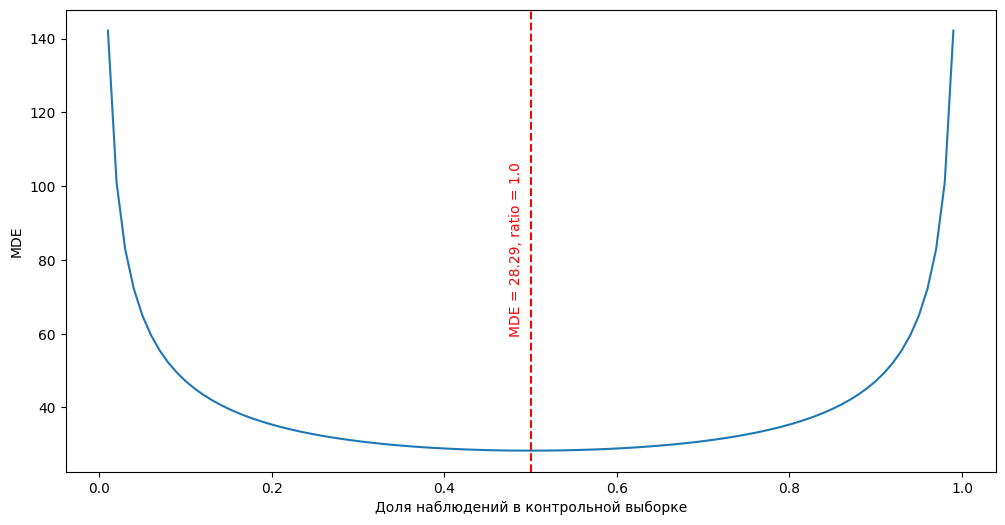

In [75]:
plt.figure(figsize = (12, 6))
sns.lineplot(x= lst_r_nobs1, y = lst_MDE)
plt.axvline(x = optimal_nobs1, linestyle  = '--', color = 'red')
plt.text(x = optimal_nobs1*0.95, y = 60, s = f'MDE = {min_MDE:.2f}, ratio = {optimal_ratio}', rotation = 'vertical', color = 'red')
plt.ylabel('MDE')
plt.xlabel('Доля наблюдений в контрольной выборке')
plt.show()

**Вывод**: симуляция показала, что при зафиксированном количестве наблюдений наименьшее значение MDE, которое мы можем получить, достигается при равномерном распределении пользователей на тестовую и контрольную группу. Для общего кол-ва пользователей 100 тыс. размеры тестовой и контрольной группы должны будут составить по 50 тыс. в каждой.

# Вывод

Не смотря на все манипуляции с целью отловить эффект, при таком подходе мы все равно остаемся ограничены другим гиперпараметром - размером стандартного отклонения. Чем больше стандартное отклонение - тем заведомо меньше наши возможности детектировать изменения. Но эту проблему решает целый ряд других подходов - таких как стратификация, CUPED и др.

Зато мы проверили необходимость учитывать уровень ошибки II рода и мощность, и тем самым контролировать вероятность не пропускать эффекты от нововведений там, где они есть

# Дополнительные материалы

Douglas Altman. Statistics with Confidence: Confidence Intervals and Statistical Guidelines: https://www.amazon.com/Statistics-Confidence-Intervals-Statistical-Guidelines/dp/0727913751

Jerrold Zar. Biostatistical Analysis: https://www.amazon.com/Biostatistical-Analysis-Books-Carte-5th/dp/0321656865

David Machin. Sample Sizes for Clinical, Laboratory and Epidemiology Studies: https://www.amazon.com/Sample-Clinical-Laboratory-Epidemiology-Studies-dp-1118874943/dp/1118874943/ref=dp_ob_title_bk

Charles DiMaggio. Power Tools for Epidemiologists: http://www.columbia.edu/~cjd11/charles_dimaggio/DIRE/styled-4/code-12/

Evan Miller. How Not To Run an A/B Test: https://www.evanmiller.org/how-not-to-run-an-ab-test.html

The World Bank. Power Calculations: https://dimewiki.worldbank.org/Power_Calculations

Sample size, power and effect size revisited (обзорная статья, приведены рекомендации по расчету): https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7745163/#r16